<a href="https://colab.research.google.com/github/annefrancine/DataScience_Estiam/blob/main/SVM_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Avant toute chose, nous allons commencer par établir un cadre à ce que nous allons voir. En particulier, qu’est-ce qu’un problème de classification ?

Considérons l’exemple suivant. On se place dans le plan, et l’on dispose de deux catégories : les ronds rouges et les carrés bleus, chacune occupant une région différente du plan. Cependant, la frontière entre ces deux régions n’est pas connue. Ce que l’on veut, c’est que quand on lui présentera un nouveau point dont on ne connaît que la position dans le plan, l’algorithme de classification sera capable de prédire si ce nouveau point est un carré rouge ou un rond bleu.

Voici notre problème de classification : pour chaque nouvelle entrée, être capable de déterminer à quelle catégorie cette entrée appartient.
Autrement dit, il faut être capable de trouver la frontière entre les différentes catégories. Si on connaît la frontière, savoir de quel côté de la frontière appartient le point, et donc à quelle catégorie il appartient.
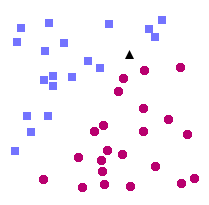


Le SVM est une solution à ce problème de classification1. Le SVM appartient à la catégorie des classificateurs linéaires (qui utilisent une séparation linéaire des données), et qui dispose de sa méthode à lui pour trouver la frontière entre les catégories.

Pour que le SVM puisse trouver cette frontière, il est nécessaire de lui donner des données d’entraînement. En l’occurrence, on donne au SVM un ensemble de points, dont on sait déjà si ce sont des carrés rouges ou des ronds bleus, comme dans la Figure 1. A partir de ces données, le SVM va estimer l’emplacement le plus plausible de la frontière : c’est la période d'entraînement, nécessaire à tout algorithme d’apprentissage automatique.

Une fois la phase d’entraînement terminée, le SVM a ainsi trouvé, à partir de données d’entraînement, l’emplacement supposé de la frontière. En quelque sorte, il a « appris » l’emplacement de la frontière grâce aux données d’entraînement. Qui plus est, le SVM est maintenant capable de prédire à quelle catégorie appartient une entrée qu’il n’avait jamais vue avant, et sans intervention humaine (comme c’est le cas avec le triangle noir dans la Figure 2) : c’est là tout l’intérêt de l’apprentissage automatique.

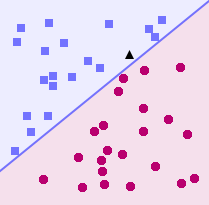

In [ ]:
from google.colab import files
files.upload()

Saving winequality-white.csv to winequality-white.csv


{'winequality-white.csv': b'"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"\n7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6\n6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6\n8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6\n7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6\n7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6\n8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6\n6.2;0.32;0.16;7;0.045;30;136;0.9949;3.18;0.47;9.6;6\n7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6\n6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6\n8.1;0.22;0.43;1.5;0.044;28;129;0.9938;3.22;0.45;11;6\n8.1;0.27;0.41;1.45;0.033;11;63;0.9908;2.99;0.56;12;5\n8.6;0.23;0.4;4.2;0.035;17;109;0.9947;3.14;0.53;9.7;5\n7.9;0.18;0.37;1.2;0.04;16;75;0.992;3.18;0.63;10.8;5\n6.6;0.16;0.4;1.5;0.044;48;143;0.9912;3.54;0.52;12.4;7\n8.3;0.42;0.62;19.25;0.04;41;172;1.0002;2.98;0.67;9.7;5\n6.6;

In [ ]:
import numpy as np
# charger les données
import pandas as pd
data = pd.read_csv('winequality-white.csv', sep=';')

# créer la matrice de données
X = data[data.columns[:-1]].values

# créer le vecteur d'étiquettes
y = data['quality'].values

# transformer en un problème de classification binaire
y_class = np.where(y<6, 0, 1)

Avant toute chose, nous allons découper nos données en un jeu d'entraînement (X_train, y_train) et un jeu de test (X_test, y_test).

In [ ]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y_class, test_size=0.3)


Nous pouvons maintenant standardiser les variables, c'est-à-dire les centrer (ramener leur moyenne à 0) et les réduire (ramener leur écart-type à 1), afin qu'elles se placent toutes à peu près sur la même échelle

In [ ]:
# standardiser les données
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

OK, nous pouvons enfin entraîner notre première SVM à noyau !

In [ ]:
# Créer une SVM avec un noyau gaussien de paramètre gamma=0.01
from sklearn import svm
classifier = svm.SVC(kernel='rbf', gamma=0.01)

# Entraîner la SVM sur le jeu d'entraînement
classifier.fit(X_train_std, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Comment se comporte-t-elle sur le jeu de test ? Nous allons pour le comprendre regarder la courbe ROC.

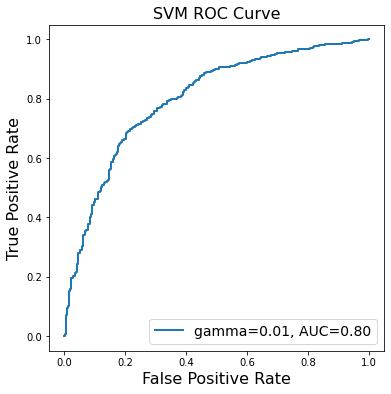

In [ ]:
# prédire sur le jeu de test
y_test_pred = classifier.decision_function(X_test_std)

# construire la courbe ROC
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(y_test, y_test_pred)

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)

# créer une figure
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

Une courbe ROC (receiver operating characteristic) est un graphique représentant les performances d'un modèle de classification pour tous les seuils de classification. Cette courbe trace le taux de vrais positifs en fonction du taux de faux positifs :

- Taux de vrais positifs
- Taux de faux positifs

Une courbe ROC trace les valeurs TVP et TFP pour différents seuils de classification. Diminuer la valeur du seuil de classification permet de classer plus d'éléments comme positifs, ce qui augmente le nombre de faux positifs et de vrais positifs. La figure ci-dessous représente une courbe ROC classique.

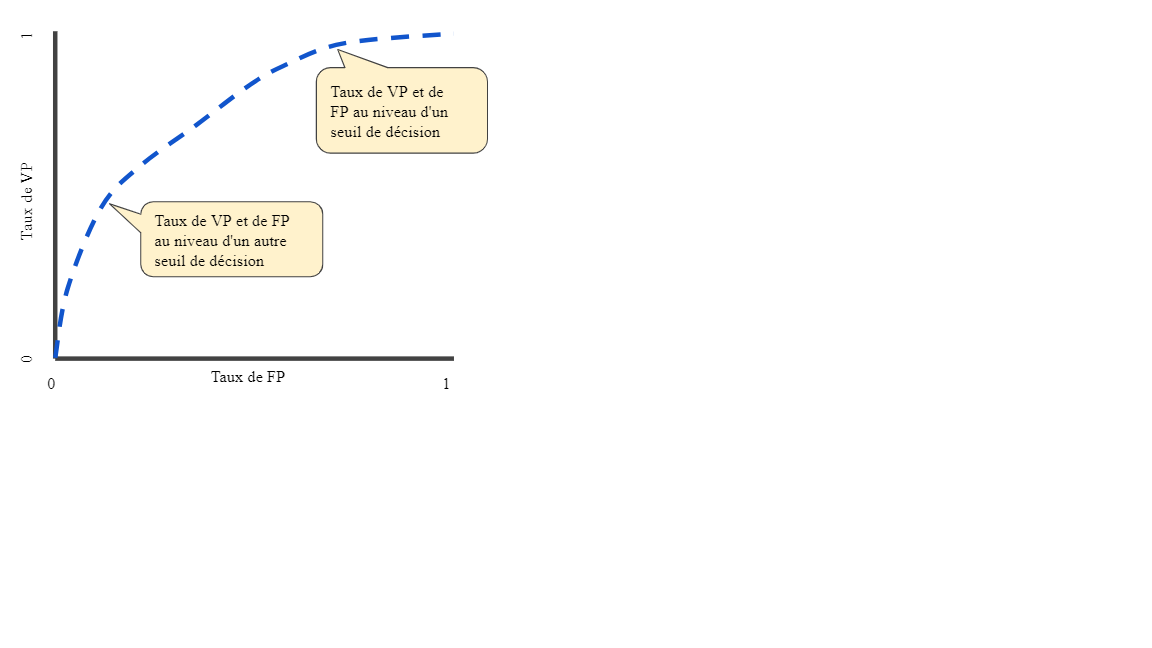

AUC (aire sous la courbe ROC)

L'aire sous la courbe ROC (ou Area Under the Curve, AUC) peut être interprétée comme la probabilité que, parmi deux sujets choisis au hasard, un malade et un non-malade, la valeur du marqueur soit plus élevée pour le malade que pour le non-malade. Par conséquent, une AUC de 0,5 (50%) indique que le marqueur est non-informatif. Une augmentation de l'AUC indique une amélioration des capacités discriminatoires, avec un maximum de 1,0 (100%).

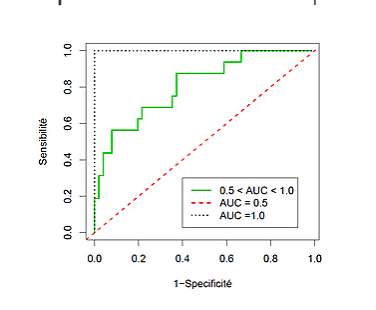



Nous allons ici utiliser une validation croisée sur le jeu d'entraînement pour sélectionner les valeurs optimales de C et de gamma parmi une grille de valeurs.

In [ ]:
# choisir 6 valeurs pour C, entre 1e-2 et 1e3
C_range = np.logspace(-2, 3, 6)

# choisir 4 valeurs pour gamma, entre 1e-2 et 10
gamma_range = np.logspace(-2, 1, 4)

# grille de paramètres
param_grid = {'C': C_range, 'gamma': gamma_range}

# critère de sélection du meilleur modèle
score = 'roc_auc'

# initialiser une recherche sur grille
grid = model_selection.GridSearchCV(svm.SVC(kernel='rbf'), 
                                    param_grid, 
                                    cv=5, # 5 folds de validation croisée  
                                    scoring=score)

# faire tourner la recherche sur grille
grid.fit(X_train_std, y_train)

# afficher les paramètres optimaux
print("The optimal parameters are {} with a score of {:.2f}".format(grid.best_params_, grid.best_score_))

The optimal parameters are {'C': 1.0, 'gamma': 1.0} with a score of 0.86


Nous pouvons maintenant évaluer la performance de notre modèle optimisé sur le jeu de test 

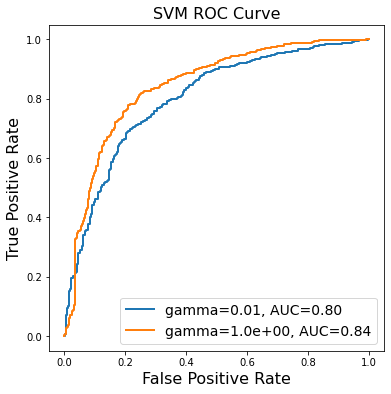

In [ ]:
# prédire sur le jeu de test avec le modèle optimisé
y_test_pred_cv = grid.decision_function(X_test_std)

# construire la courbe ROC du modèle optimisé
fpr_cv, tpr_cv, thr_cv = metrics.roc_curve(y_test, y_test_pred_cv)

# calculer l'aire sous la courbe ROC du modèle optimisé
auc_cv = metrics.auc(fpr_cv, tpr_cv)

# créer une figure
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC précédente
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# afficher la courbe ROC du modèle optimisé
plt.plot(fpr_cv, tpr_cv, '-', lw=2, label='gamma=%.1e, AUC=%.2f' % \
         (grid.best_params_['gamma'], auc_cv))
         

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

**Matrice de Gram**
Quel est l'importance du paramètre gamma ? La documentation nous indique que le noyau RBF gaussien est donné par K(x,x′)=exp(−γ||x−x′||2) .

Gamma contrôle la bande passante de la gaussienne : plus gamma est élevé, plus la gaussienne est étroite, autrement dit, plus la distance entre x et x' doit être faible pour que le noyau soit différent de 0.

In [ ]:
#matrice de Gram
from sklearn import metrics
kmatrix = metrics.pairwise.rbf_kernel(X_train_std, gamma=0.01)

Nous allons réduire cette matrice à ses 100 premières lignes et 100 premières colonnes pour en faciliter la visualisation :

In [ ]:
kmatrix100 = kmatrix[:100, :100]

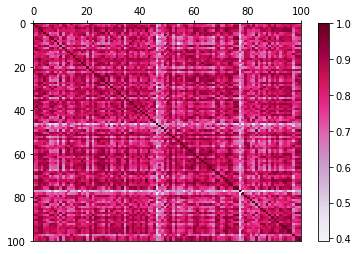

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

# dessiner la matrice
plt.pcolor(kmatrix100, cmap=matplotlib.cm.PuRd) 

# rajouter la légende
plt.colorbar()

# retourner l'axe des ordonnées
plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()

# afficher l'image
plt.show()